<a href="https://colab.research.google.com/github/cacoleman16/ECO463/blob/master/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An Example Notebook: Graphing a AR(1)

These notebooks are great for a creating interactive environment for code. They allow you to include text, code, and they can be edited live each run. 
All you have to do is hit shift + enter to make each line run 

If at any point you want to restart the notebook you can click "Runtime" -> "Restart Runtime"

In [16]:
## libraries used for this example 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess



In the next several line, I'll simulate an AR process for a given parameter. Here I take a 1000 samples for two examples

These are also neat because students can edit lines and play with it for a given set of instructions. This could also easily work for a given dataset

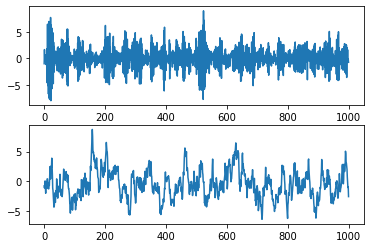

In [15]:
# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, .9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, -.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess( ar2 , ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

# Work with Data
Data can be pulled from the web or drive and used directly for examples. 

In [17]:
url = 'https://raw.githubusercontent.com/cacoleman16/ECO463/master/GDP.csv'
gdp = pd.read_csv(url)
gdp.columns = ['Date', 'Real_GDP']
gdp.Date = pd.to_datetime(gdp.Date)
# Dataset is now stored in a Pandas Dataframe (table)


The data can be graphed and the photo will save until the line is rerun

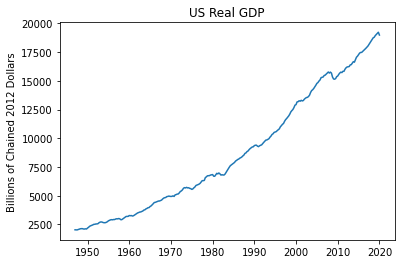

In [18]:
plt.title('US Real GDP')
plt.ylabel('Billions of Chained 2012 Dollars')
plt.plot(gdp.Date, gdp.Real_GDP)

# Graphing the first difference 

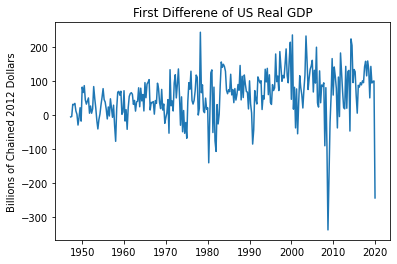

In [19]:
plt.title('First Differene of US Real GDP')
plt.ylabel('Billions of Chained 2012 Dollars')
plt.plot(gdp.Date, gdp.Real_GDP.diff())

# Autocorrelation Functions

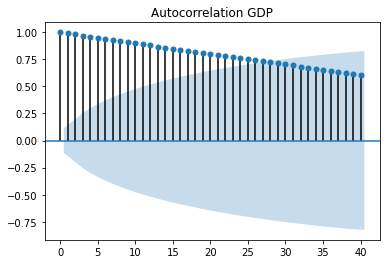

In [30]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(gdp.Real_GDP.squeeze(), lags=40, title='Autocorrelation GDP')
plt.show()


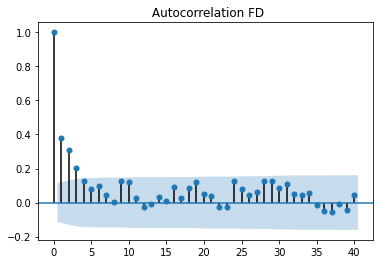

In [29]:
sm.graphics.tsa.plot_acf(gdp.Real_GDP.diff().dropna(), lags=40, title=' Autocorrelation FD')
plt.show()

Partial Autocorrelation Functions

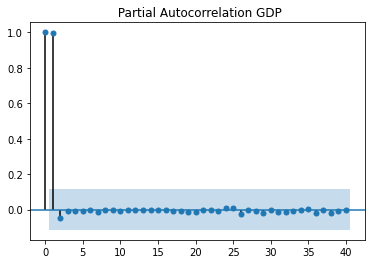

In [28]:
sm.graphics.tsa.plot_pacf(gdp.Real_GDP.squeeze(), lags=40, title=' Partial Autocorrelation GDP')
plt.show()

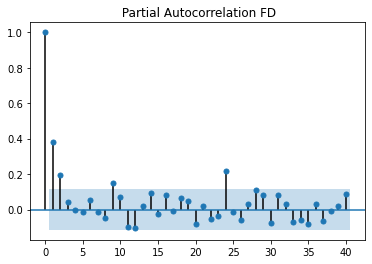

In [27]:
sm.graphics.tsa.plot_pacf(gdp.Real_GDP.diff().dropna(), lags=40,  title=' Partial Autocorrelation FD')
plt.show()